## Библиотека pandas. Упражнения.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [3]:
pima = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/pima-indians-diabetes.csv')
pima.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

In [4]:
coloms_dict = {"Pregnancies": "discrete",
               "Glucose": "discrete",
               "BloodPressure": "discrete",
               "SkinThickness": "discrete",
               "Insulin": "discrete",
               "BMI": "continuous",
               "DiabetesPedigreeFunction": "continuous",
               "Age": "discrete",
               "Class": "category"
                }

__Задание 1.__

Как вы видите, в данных много пропусков (NaN). Посчитайте количество пропусков в каждом из столбцов.

In [5]:
print('Пропусков в каждом признаке: \n', pima.isna().sum())

Пропусков в каждом признаке: 
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                         0
dtype: int64


__Задание 2.__

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [6]:
def fill_NA_in_data(data):
    """
    Функция принимает на вход датафрейм с пропусками 
    Возвращает датафрейм без пропусков
    """
    for i in data.columns:
        if np.any(data[i].isna()):
            if coloms_dict[i] == 'continuous':
                data[i] = data[i].fillna(data[i].mean())
                print(f'Feature {i} is {coloms_dict[i]}, because it filled mean')
            else:
                data[i] = data[i].fillna(data[i].median())
                print(f'Feature {i} is {coloms_dict[i]}, because it filled median')

In [7]:
fill_NA_in_data(pima)

Feature Glucose is discrete, because it filled median
Feature BloodPressure is discrete, because it filled median
Feature SkinThickness is discrete, because it filled median
Feature Insulin is discrete, because it filled median
Feature BMI is continuous, because it filled mean


In [8]:
print('Пропусков всего:', pima.isna().sum().sum())

Пропусков всего: 0


__Задание 3.__

Вычислите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [9]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


__Задание 4.__

У скольких женщин старше 50 лет обнаружен диабет?

In [10]:
# можно так
len(pima[(pima['Age'] > 50) & (pima['Class'] == 1)])

38

In [11]:
# или по другому
pima[pima['Age'] > 50]['Class'].sum()

38

__Задание 5.__

Найдите трех женщин с наибольшим числом беременностей.

In [12]:
pregnancies_list = sorted(pima['Pregnancies'].unique())
pima[pima['Pregnancies'] >= pregnancies_list[-3]].sort_values(by=['Pregnancies'], ascending=False)[0:3]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1


__Задание 6.__

Сколько женщин возраста между 30 и 40 успело родить 3 или более детей?

In [13]:
len(pima[(pima['Pregnancies'] >= 3) & (pima['Age'] >= 30) & (pima['Age'] <= 40)][['Pregnancies', 'Age']])

142

__Задание 7.__

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [14]:
count_BloodPressure_condition =  len(pima['BloodPressure'][(pima['BloodPressure'] >= 80) & (pima['BloodPressure'] <= 89)])

print(f'{round(count_BloodPressure_condition / len(pima) * 100, 2)} %')

18.88 %


__Задание 8.__

Считается, что BMI >= 30 - это признак ожирения. 
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [15]:
len(pima[['BMI', 'BloodPressure']][(pima['BMI'] >= 30) & (pima['BloodPressure'] > pima['BloodPressure'].mean())])

251

__Задание 9.__

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет. 

In [16]:
# Glucose

print('Mean Glucose for positive diabetes: {}'.format(round(pima['Glucose'][pima['Class'] == 1].mean(), 2)))
print('Mean Glucose for negative diabetes: {}'.format(round(pima['Glucose'][pima['Class'] == 0].mean(), 2)))

Mean Glucose for positive diabetes: 142.13
Mean Glucose for negative diabetes: 110.68


In [17]:
# BloodPressure

print('Mean BloodPressure for positive diabetes: {}'.format(round(pima['BloodPressure'][pima['Class'] == 1].mean(), 2)))
print('Mean BloodPressure for negative diabetes: {}'.format(round(pima['BloodPressure'][pima['Class'] == 0].mean(), 2)))

Mean BloodPressure for positive diabetes: 75.12
Mean BloodPressure for negative diabetes: 70.92


In [18]:
# Insulin

print('Mean Insulin for positive diabetes: {}'.format(round(pima['Insulin'][pima['Class'] == 1].mean(), 2)))
print('Mean Insulin for negative diabetes: {}'.format(round(pima['Insulin'][pima['Class'] == 0].mean(), 2)))

Mean Insulin for positive diabetes: 164.7
Mean Insulin for negative diabetes: 127.79


__Задание 10.__

Постройте гистограммы для любых двух количественных признаков.

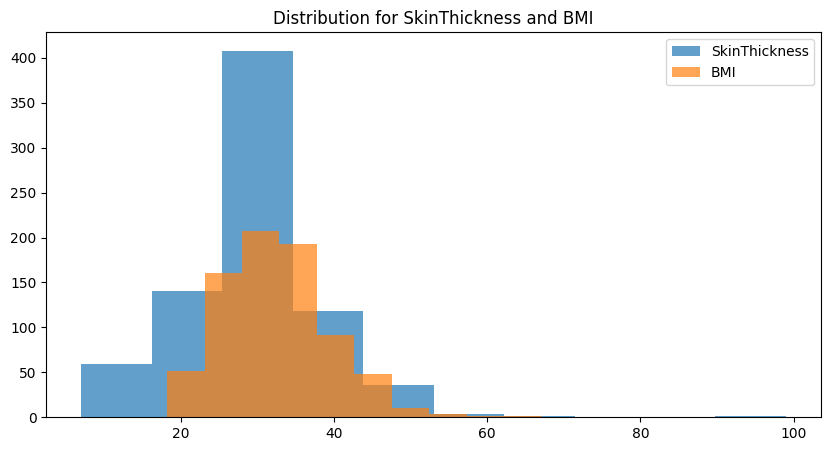

In [19]:
plt.figure(figsize=(10, 5))
plt.title('Distribution for SkinThickness and BMI')
plt.hist(pima['SkinThickness'], alpha= 0.7, label= 'SkinThickness')
plt.hist(pima['BMI'], alpha= 0.7, label= 'BMI')
plt.legend(loc= 'upper right');

__Задание 11.__

Постройте круговую диаграмму для признака __Class__.

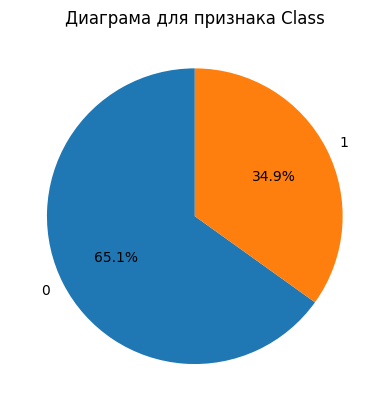

In [20]:
plt.title('Диаграма для признака Class')
plt.pie(pima['Class'].value_counts(), labels=pima['Class'].value_counts().index, autopct='%1.1f%%', startangle=90);

__Задание 12.__

Постройте распределения для признаков __Age__ и __BloodPressure__ и сравните оба распределения с нормальным. 

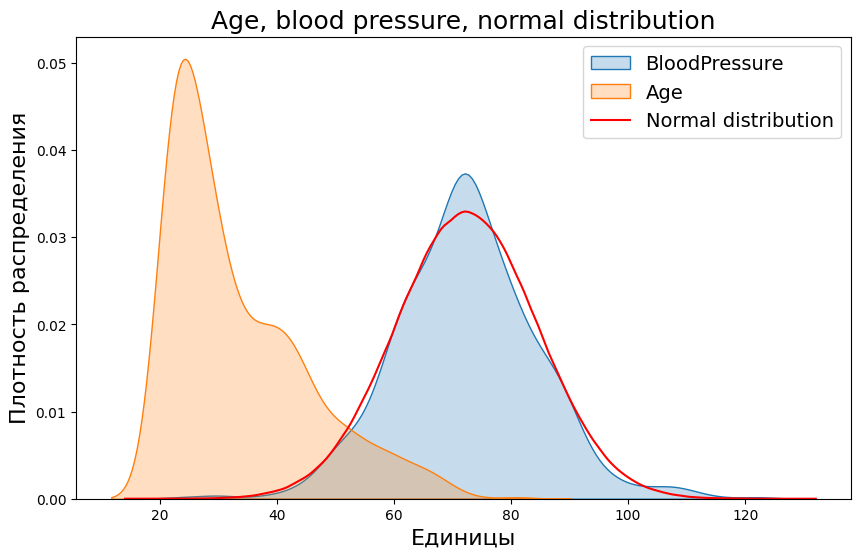

In [21]:
x = norm(pima['BloodPressure'].mean(), pima['BloodPressure'].std())
plt.figure(figsize = (10,6))
sns.kdeplot(pima['BloodPressure'], fill = True, label = 'BloodPressure')
sns.kdeplot(pima['Age'], fill = True, label = 'Age')
sns.kdeplot(x.rvs(10**6), color='r', label = 'Normal distribution')
plt.legend(loc = 'upper right', prop = {'size': 14}) 
plt.xlabel('Единицы', fontsize = 16)
plt.ylabel('Плотность распределения', fontsize = 16)
plt.title('Age, blood pressure, normal distribution', fontsize = 18)
plt.show();

__Задание 13.__

Постройте следующий график: доля больных диабетом в зависимости от числа беременностей.

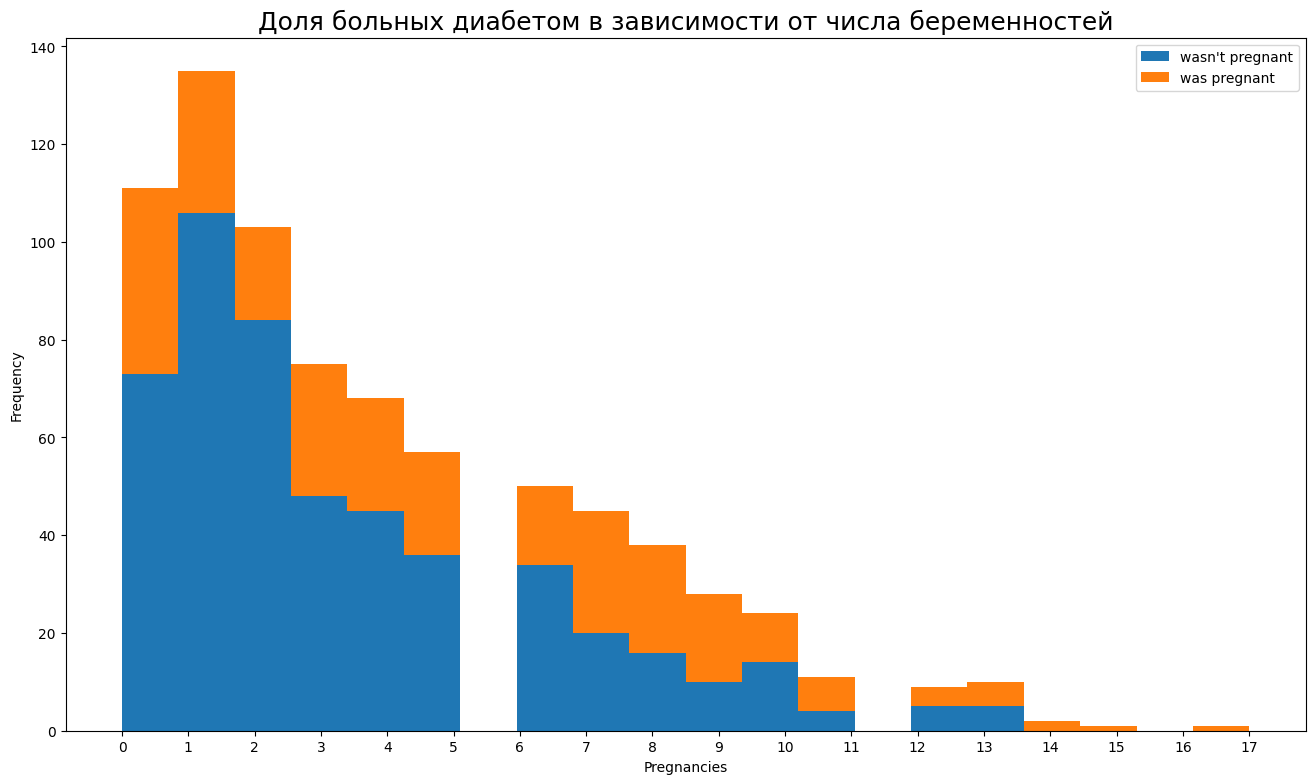

In [22]:
x_var = 'Pregnancies'
groupby_var = 'Class'
pima_groupby = pima.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [pima[x_var].values.tolist() for i, pima in pima_groupby]

plt.figure(figsize=(16,9))
plt.title(f"Доля больных диабетом в зависимости от числа беременностей", fontsize=18)
plt.hist(vals, 20, stacked= True, label = ["wasn't pregnant", "was pregnant"])
plt.legend()
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.xticks(ticks=list(range(pima['Pregnancies'].max() + 1)))

plt.show()

__Задание 14.__

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [23]:
pima['wasPregnant'] = pima['Pregnancies'].transform(lambda x: 0 if x == 0 else 1)

__Задание 15.__

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [24]:
# количество больных диабетом в данных
true_diabetes = len(pima[['Class']][(pima['Class'] == 1)])

# больные диабетом и были беременными
was_pregnant = len(pima[['Class', 'wasPregnant']][(pima['wasPregnant'] == 1) & (pima['Class'] == 1)])

# больные диабетом и не были беременными
wasnt_pregnant = len(pima[['Class', 'wasPregnant']][(pima['wasPregnant'] == 0) & (pima['Class'] == 1)])

In [25]:
per_td_was_pregnant = round(was_pregnant / true_diabetes * 100, 1)
per_td_wasnt_pregnant = round(wasnt_pregnant / true_diabetes * 100, 1)


print(f'Процент больных диабетом из рожавших: {per_td_was_pregnant}%')
print(f'Процент больных диабетом из нерожавших: {per_td_wasnt_pregnant}%')

Процент больных диабетом из рожавших: 85.8%
Процент больных диабетом из нерожавших: 14.2%


__Задание 16.__

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__ 

Underweight = <18.5

Normal weight = 18.5–24.9 

Overweight = 25–29.9 

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [26]:
def segment_data(column_data):
    if column_data < 18.5:
        return 'Underweight'
    elif (column_data >= 18.5) and (column_data <= 24.9):
        return 'Normal weight'
    elif (column_data >= 25) and (column_data <= 29.9):
        return 'Overweight'
    elif column_data >= 30:
        return 'Obesity'
    
pima['bodyType'] = pima['BMI'].transform(segment_data)

__Задание 17.__

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [27]:
healthy_woman = pima[['BloodPressure', 'bodyType', 'Class']][(pima['BloodPressure'] >= 80) & 
                                                             (pima['BloodPressure'] <= 89) & 
                                                             (pima['bodyType'] == 'Normal weight')]

healthy_woman_with_diabets = healthy_woman[healthy_woman['Class'] == 1]


print(f'{round((len(healthy_woman_with_diabets) / len(healthy_woman)* 100))}% "здоровых" женщин больны диабетом')

10% "здоровых" женщин больны диабетом


# Датасет 2


In [28]:
babies = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/babies%20names/babies_all.txt', index_col=0)

## Задание 1.
Исследуйте набор данных babies. Ответьте на вопросы.

1) Какие годы включает датасет

In [29]:
print('From {} to {}'.format(babies['year'].min(), babies['year'].max()))

From 1880 to 2010


2) Какое имя в датасете находится по индексом 121?

In [30]:
babies['name'].iloc[121]

'Ann'

3) Cколько всего родилось детей по имени 'Aaron' за все время?

In [31]:
len(babies[babies['name'] == 'Aaron'])

212

4) Насколько больше за все время родилось мальчиков чем девочек?

In [32]:
count_sex = babies.groupby('sex')['name'].count()

print('На {} больше за все время родилось мальчиков, чем девочек'.format(count_sex['M'] - count_sex['F']))

На -317186 больше за все время родилось мальчиков, чем девочек


5) Cколько мальчиков родилось в 2010?

In [33]:
len(babies.loc[(babies['sex'] == 'M') & (babies['year'] == 2010)])

14140

6) Сколько в датасете девочек по имени John?

In [34]:
len(babies.loc[(babies['sex'] == 'F') & (babies['name'] == 'John')])

131

## Задание 2

1. Сгруппируйте набор данных babies по году и полу и сохраните результаты в два новых датафрейма: baby_girls и baby_boys.
2. Создайте фигуру matplotlib с 3 графиками один под другим.
3. Постройте линейные графики. Первый график должен показывать тренд рождаемости для девочек, второй - для мальчиков, третий объединять их все вместе (с теми же цветами, что в индивидуальных графиках). Годы - x, количество детей - y. 
4. Верхняя и правая границы графиков должны быть невидимы, к каждому графику должен быть заголовок, третий график должен содержать легенду, шкалы графиков должны быть подписаны.
5. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.
6. Кратко опишите тренды в ячейке markdown под графиками.

Если при группировке вы сделали год индексом, то можно обратиться к значениям этой переменной через аттрибут .index


1. Сгруппируйте набор данных babies по году и полу и сохраните результаты в два новых датафрейма: baby_girls и baby_boys.

In [69]:
baby_girls = pd.DataFrame(babies[babies['sex'] == 'F'].groupby(['year'])['number'].sum()).reset_index()
baby_boys = pd.DataFrame(babies[babies['sex'] == 'M'].groupby(['year'])['number'].sum()).reset_index()

2. Создайте фигуру matplotlib с 3 графиками один под другим.
3. Постройте линейные графики. Первый график должен показывать тренд рождаемости для девочек, второй - для мальчиков, третий объединять их все вместе (с теми же цветами, что в индивидуальных графиках). Годы - x, количество детей - y. 
4. Верхняя и правая границы графиков должны быть невидимы, к каждому графику должен быть заголовок, третий график должен содержать легенду, шкалы графиков должны быть подписаны.
5. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.

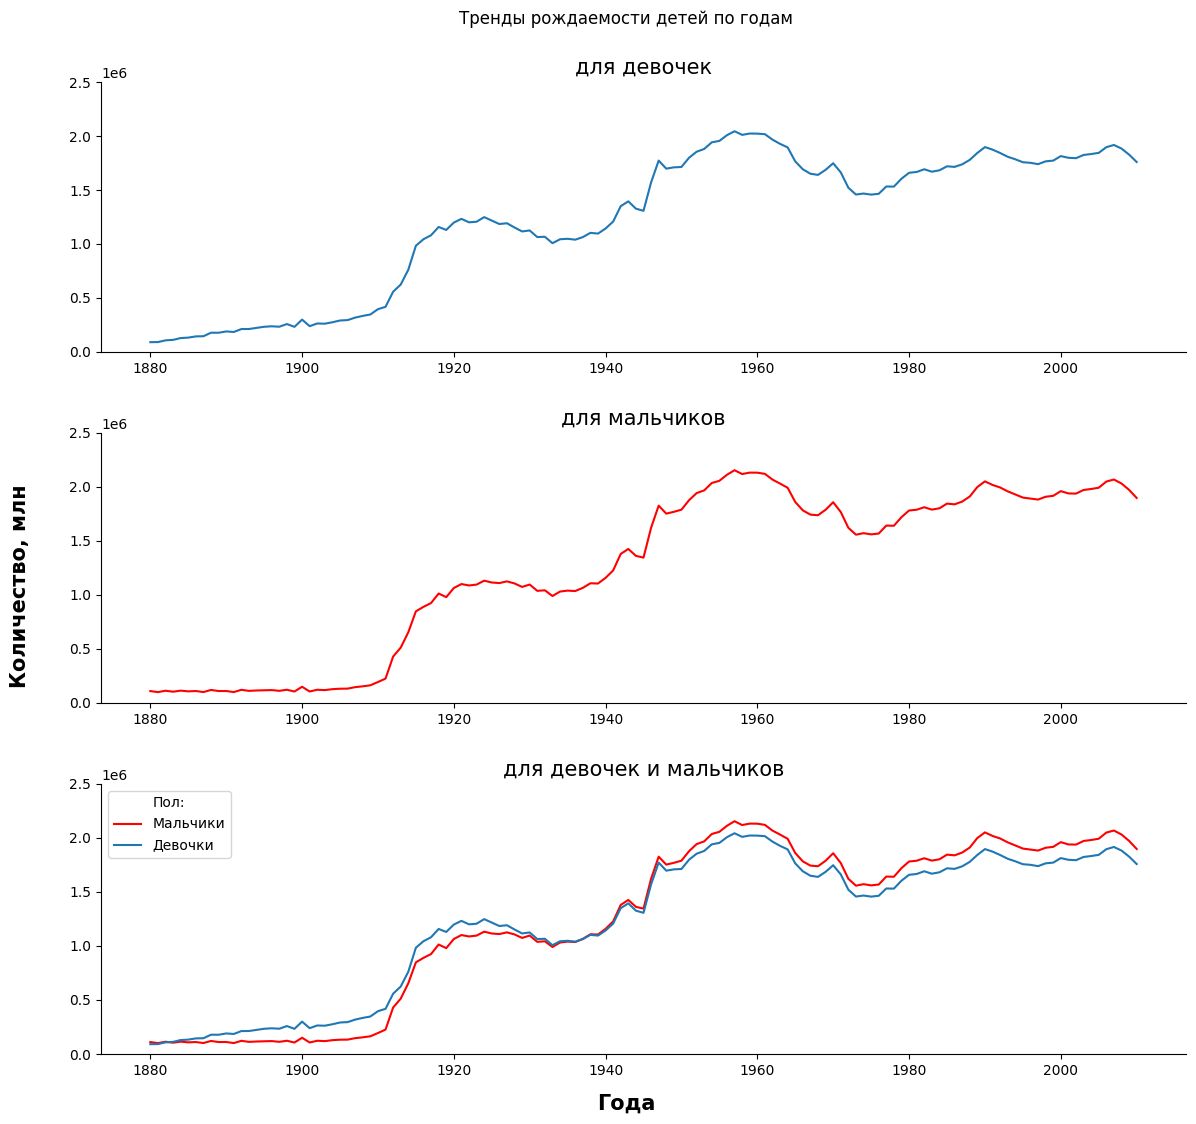

In [81]:
fig, axs = plt.subplots(nrows= 3 , ncols= 1, figsize= [14, 12])
fig.suptitle('Тренды рождаемости детей по годам')
fig.supxlabel('Года', fontsize= 15, fontweight= 'bold', y= 0.06)
fig.supylabel('Количество, млн', fontsize= 15, fontweight= 'bold', x= 0.06)

axs[0].set_title('для девочек', fontsize= 15)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].plot(baby_girls['year'], baby_girls['number'])
axs[0].set_ylim([0, 2.5 * 10**6])

axs[1].set_title('для мальчиков', fontsize= 15)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].plot(baby_boys['year'], baby_boys['number'], color='r')
axs[1].set_ylim([0, 2.5 * 10**6])

axs[2].set_title('для девочек и мальчиков', fontsize= 15)
axs[2].plot(baby_boys['year'], baby_boys['number'], color='r', label= 'Мальчики')
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].plot(baby_girls['year'], baby_girls['number'], label= 'Девочки')
axs[2].set_ylim([0, 2.5 * 10**6])
axs[2].legend(title= 'Пол:')

plt.subplots_adjust(hspace= 0.3, top= 0.92)
plt.show()

6. Кратко опишите тренды в ячейке markdown под графиками.

Динамика изменения количества рождений мальчиков и девочек по годам схожи. Но в количественном выражении примерно с 1950-о года мальчиков рождается несколько больше.  

## Задание 3

1. Сгруппируйте нужным способом датафрейм babies и найдите 4 самых популярных имени за всю историю (2 женских и 2 мужских).

In [47]:
top_two_m_name = babies[babies['sex'] == 'M'].sort_values(by='number', ascending= False)['name'].unique()[:2]
top_two_f_name = babies[babies['sex'] == 'F'].sort_values(by='number', ascending= False)['name'].unique()[:2]

print("2 самых популярных женских имени:", top_two_f_name)
print("2 самых популярных мужских имени:", top_two_m_name)

2 самых популярных женских имени: ['Linda' 'Mary']
2 самых популярных мужских имени: ['James' 'Michael']


2. Для каждого найденного имени создайте новый датафрейм вида babies_alisa и сохраните в него данные, сколько детей с таким именем рождалось каждый год.

In [57]:
babies_James = babies[(babies['name'] == top_two_m_name[0]) & (babies['sex'] == 'M')]
babies_Michael = babies[(babies['name'] == top_two_m_name[1]) & (babies['sex'] == 'M')]
babies_Linda = babies[(babies['name'] == top_two_f_name[0]) & (babies['sex'] == 'F')]
babies_Mary = babies[(babies['name'] == top_two_f_name[1]) & (babies['sex'] == 'F')]

3. Создайте фигуру matplotlib с 4 горизонтальными графиками один под другим.
4. Постройте 4 линейных графика - тренд для каждого имени за все время.
5. Каждый график должен содержать легенду, один общий заголовок, шкалы графиков должны быть подписаны.
6. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.

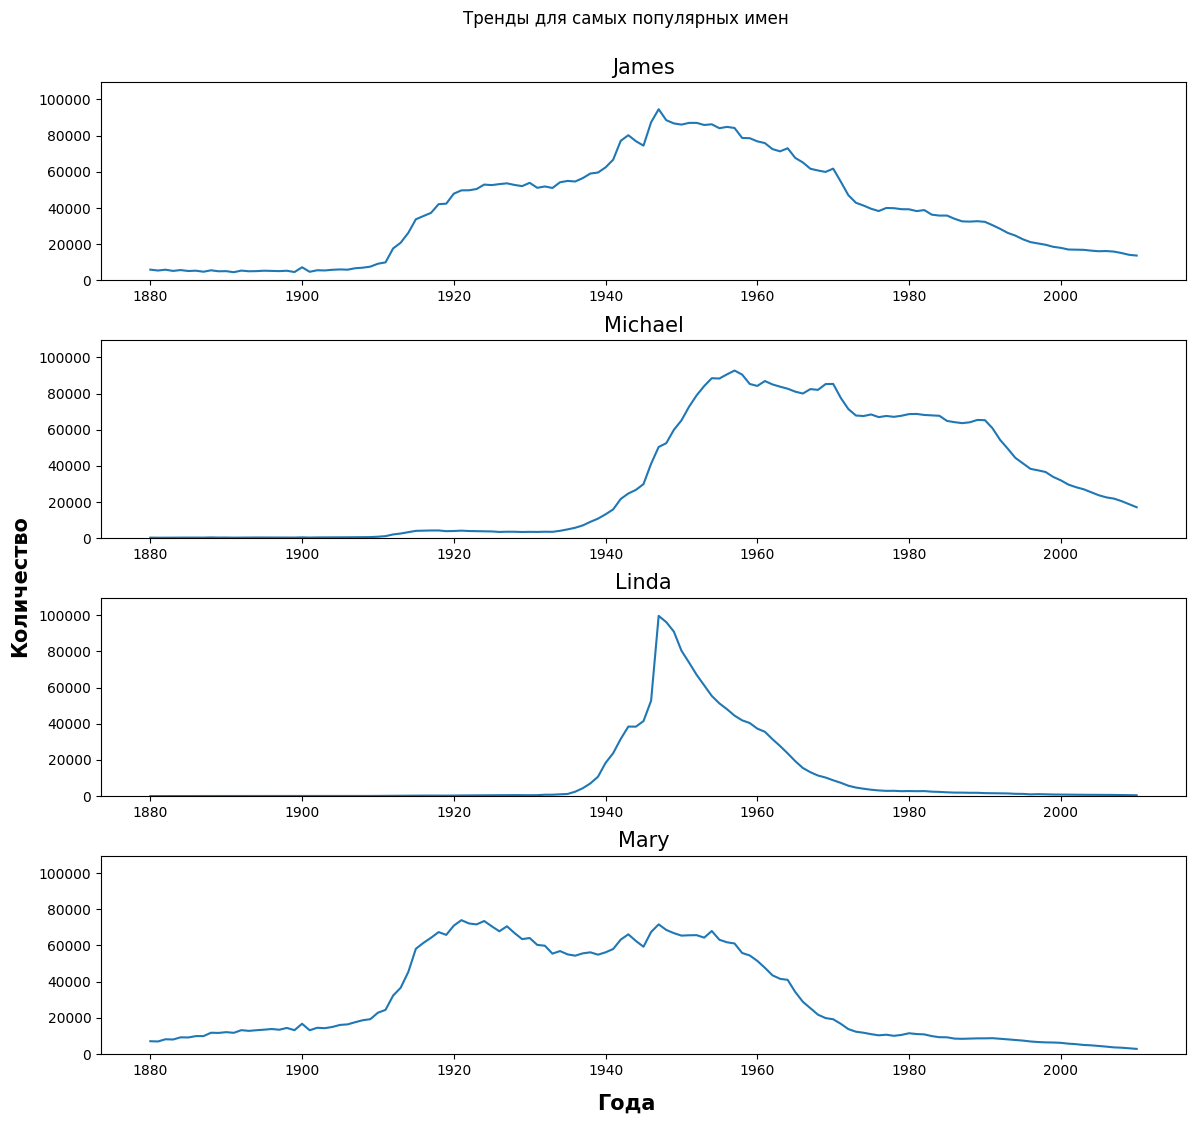

In [65]:
fig, axs = plt.subplots(nrows= 4, ncols= 1, figsize= [14, 12])
fig.suptitle('Тренды для самых популярных имен')
fig.supxlabel('Года', fontsize= 15, fontweight= 'bold', y= 0.06)
fig.supylabel('Количество', fontsize= 15, fontweight= 'bold', x= 0.06)

axs[0].set_title('James', fontsize= 15)
axs[0].plot(babies_James['year'], babies_James['number'])
axs[0].set_ylim([0, babies_Linda['number'].max() + 10**4])

axs[1].set_title('Michael', fontsize= 15)
axs[1].plot(babies_Michael['year'], babies_Michael['number'])
axs[1].set_ylim([0, babies_Linda['number'].max() + 10**4])

axs[2].set_title('Linda', fontsize= 15)
axs[2].plot(babies_Linda['year'], babies_Linda['number'])
axs[2].set_ylim([0, babies_Linda['number'].max() + 10**4])

axs[3].set_title('Mary', fontsize= 15)
axs[3].plot(babies_Mary['year'], babies_Mary['number'])
axs[3].set_ylim([0, babies_Linda['number'].max() + 10**4])

plt.subplots_adjust(hspace= 0.3, top= 0.92)
plt.show()

7. Опишите тренды в ячейке markdown под графиками.

Тренды имен имеют волнообразный характер с продолжительностью волны 40 до 90 лет. 